In [138]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.font_manager
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

### 문제 1

In [139]:
cafe = pd.read_csv('samples/cafe_2year.csv')
cafe

,기준월,카페수
0,201710,79296
1,201711,80738
2,201712,76923
3,201801,77942
4,201802,84967
5,201803,80719
6,201804,80719
7,201805,87156
8,201806,81248
9,201807,82191


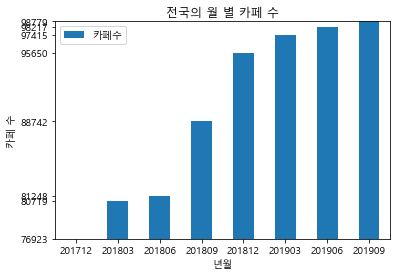

In [194]:
x = np.arange(2, 24, 3)
ref_cafe = cafe.loc[x]
ref_cafe.plot.bar(x='기준월', y='카페수', rot=0)
plt.title("전국의 월 별 카페 수")
plt.xlabel("년월")
plt.ylabel("카페 수")
plt.ylim((76923, 98779))
plt.yticks([76923, 80719, 81248, 88742, 95650, 97415, 98217, 98779])
plt.show()

### 문제 2

In [141]:
doc = pd.read_csv('samples/doctor_2019.csv')
doc

,지역,병원명,일반의 수,인턴 수,레지던트 수,전문의 수
0,인천,가톨릭대학교인천성모병원,1,22,68,201
1,서울,강북삼성병원,6,28,137,204
2,서울,건국대학교병원,1,37,164,225
3,대구,경북대학교병원,5,77,209,225
4,경남,경상대학교병원,1,35,114,182
...,...,...,...,...,...,...
350,서울,홍익병원,1,4,14,55
351,강원,홍천아산병원,1,0,0,10
352,경기,효산의료재단 안양샘병원,7,5,17,86
353,경기,효산의료재단 지샘병원,2,0,2,72


In [142]:
gen_num = []
intern_num = []
resi_num = []
certi_num = []
for city in ['서울', '부산', '대구', '인천', '대전', '광주', '울산']:
    gen = doc[doc['지역'] == city]['일반의 수'].sum()
    intern = doc[doc['지역'] == city]['인턴 수'].sum()
    resi = doc[doc['지역'] == city]['레지던트 수'].sum()
    certi = doc[doc['지역'] == city]['전문의 수'].sum()
    gen_num.append(gen)
    intern_num.append(intern)
    resi_num.append(resi)
    certi_num.append(certi)

major_city_doc = pd.DataFrame({
    '일반의': gen_num,
    '인턴': intern_num,
    '레지던트': resi_num,
    '전문의': certi_num 
}, index=['서울', '부산', '대구', '인천', '대전', '광주', '울산'])
major_city_doc.index.names = ['지역']
major_city_doc

,일반의,인턴,레지던트,전문의
지역,,,,
서울,162,1196,4757,9375
부산,58,197,785,2211
대구,27,215,712,1436
인천,47,138,444,1518
대전,25,142,425,1006
광주,16,102,356,1006
울산,19,23,104,467


### 문제 3

In [143]:
major_city_doc.to_csv('doctor2.csv')

### 문제 4

In [144]:
doc2 = pd.read_csv('doctor2.csv')
doc2

,지역,일반의,인턴,레지던트,전문의
0,서울,162,1196,4757,9375
1,부산,58,197,785,2211
2,대구,27,215,712,1436
3,인천,47,138,444,1518
4,대전,25,142,425,1006
5,광주,16,102,356,1006
6,울산,19,23,104,467


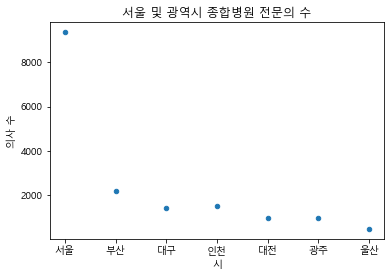

In [145]:
doc2.plot.scatter(x='지역', y='전문의')
plt.title('서울 및 광역시 종합병원 전문의 수')
plt.xlabel('시')
plt.ylabel('의사 수')
plt.show()

### 문제 5

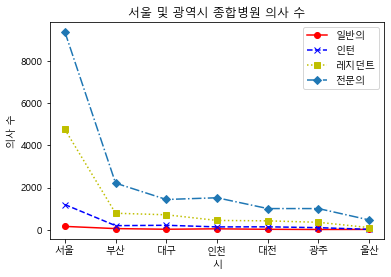

In [146]:
plt.plot(doc2['지역'], doc2['일반의'], 'r-', marker='o', label='일반의')
plt.plot(doc2['지역'], doc2['인턴'], 'b--', marker='x', label='인턴')
plt.plot(doc2['지역'], doc2['레지던트'], 'y:', marker='s', label='레지던트')
plt.plot(doc2['지역'], doc2['전문의'], 'p-.', marker='D', label='전문의')
plt.title('서울 및 광역시 종합병원 의사 수')
plt.xlabel('시')
plt.ylabel('의사 수')
plt.legend()
plt.show()

### 문제 6

In [179]:
tmp_doc2 = doc2[doc2['지역'] == '서울'].values.tolist()
tmp_doc2 = tmp_doc2[0][1:]

RangeIndex(start=0, stop=7, step=1)

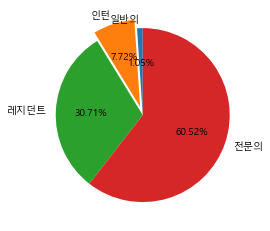

In [189]:
plt.pie(tmp_doc2, labels=['일반의', '인턴', '레지던트', '전문의'], startangle=90, autopct='%.2f%%', explode=[0, 0.10, 0, 0])
plt.show()